# Graph variance
In this notebook, we illustrate that the prior variance is generally non-uniform across the vertices (Figure 1 in the paper).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from graph_matern.kernels.graph_matern_kernel import GraphMaternKernel

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # for the camera-ready paper

In [3]:
import numpy as np
import scipy
import random

In [4]:
seed = 123
random.seed(seed)
np.random.seed(seed)

In [5]:
num_nodes = 10

In [6]:
cmap = plt.get_cmap('plasma')

In [7]:
def check_eigvals(laplacian, eigvals, eigvecs):
    # (N, N) * (N, M) = (N, M)
    lhs = laplacian.dot(eigvecs) 
    # (M,) * (N, M) = (N, M)
    rhs = eigvals * eigvecs
    
    assert np.allclose(lhs, rhs)

In [8]:
def draw_marginal_variance(G, *args, **kwargs):
    laplacian = nx.laplacian_matrix(G).astype(np.float64)
    eigvals, eigvecs = scipy.sparse.linalg.eigsh(laplacian, k=num_nodes-1)
    
    check_eigvals(laplacian, eigvals, eigvecs)

    kernel = GraphMaternKernel((eigvecs, eigvals), nu=1.5, kappa=1.)

    node_ids = np.arange(num_nodes)[:, None]
    variance = kernel.K_diag(node_ids).numpy()
    variance /= np.mean(variance)  # normalize the variance by the mean, this basically amounts to a specific scaling constant
    
    vmax = variance.max()
    vmin = variance.min()
    if np.isclose(vmin, vmax):
        vmin = 0.0

    nx.draw(G, *args, cmap=cmap, node_color=variance, vmin=vmin, vmax=vmax, **kwargs)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    cbar = plt.colorbar(sm)
    # cbar.ax.tick_params(labelsize=25)

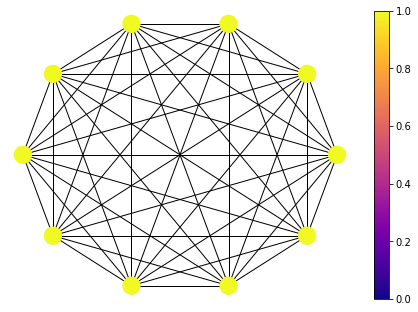

In [9]:
G = nx.complete_graph(num_nodes)

draw_marginal_variance(G, pos=nx.circular_layout(G))

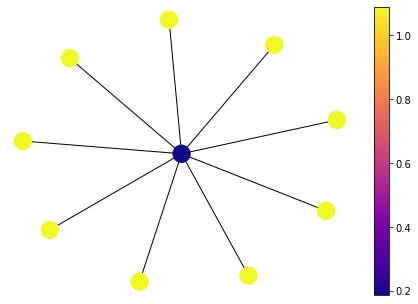

In [10]:
G = nx.star_graph(num_nodes-1)
draw_marginal_variance(G)

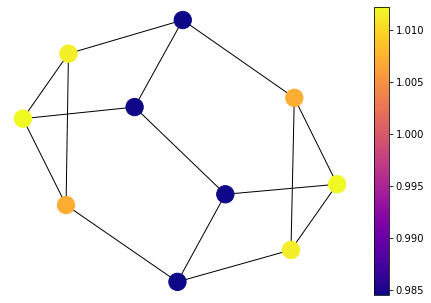

In [11]:
G = nx.random_regular_graph(3, num_nodes)
draw_marginal_variance(G)

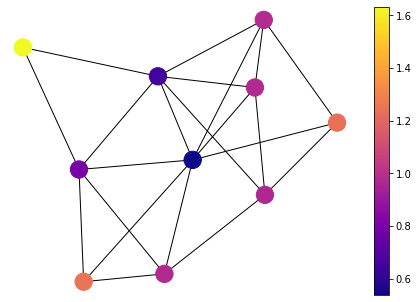

In [12]:
G = nx.barabasi_albert_graph(num_nodes, 3)
draw_marginal_variance(G)

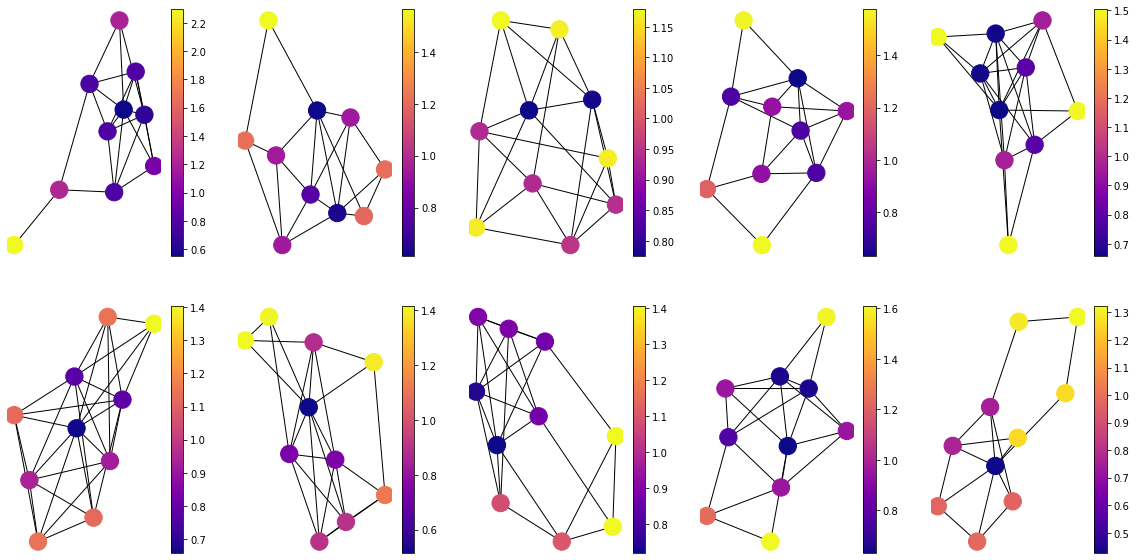

In [13]:
prob = 0.5
fig = plt.figure(figsize=(20, 10))
gnp_graphs = []
for i in range(10):
    plt.subplot(2, 5, i+1)
    G = nx.gnp_random_graph(num_nodes, prob)
    gnp_graphs.append(G)
    draw_marginal_variance(G, pos=nx.spring_layout(G, seed=666))

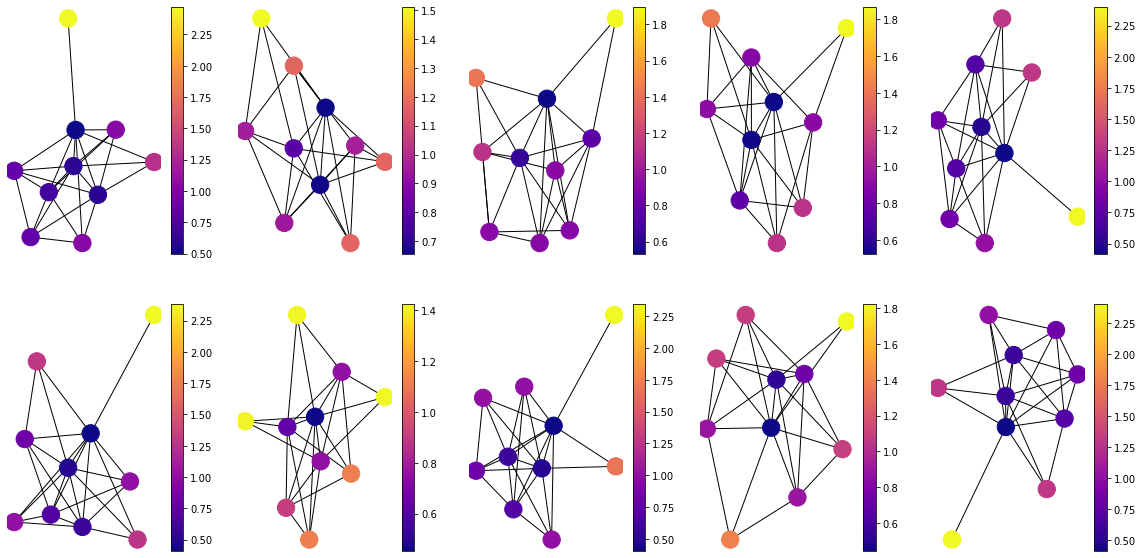

In [14]:
fig = plt.figure(figsize=(20, 10))
barabasi_graphs = []
for i in range(10):
    plt.subplot(2, 5, i+1)
    G = nx.barabasi_albert_graph(num_nodes, 5)
    barabasi_graphs.append(G)
    draw_marginal_variance(G, pos=nx.spring_layout(G, seed=666))

The next two graphs are in the paper.

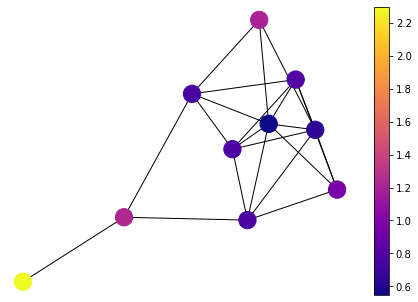

In [15]:
draw_marginal_variance(gnp_graphs[0], pos=nx.spring_layout(gnp_graphs[0], seed=666))

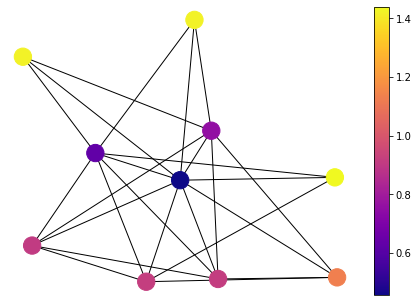

In [16]:
sd = 222
random.seed(sd)
np.random.seed(sd)
G = nx.barabasi_albert_graph(num_nodes, 5)
draw_marginal_variance(G, pos=nx.spring_layout(G, seed=666))